## Import part

In [1]:
# *************************************
# coded by Kosuke Sato from 2017.2.21
# *************************************
import sys
import cmath
import math
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#import utility

## Read files

In [4]:
def read_files(l,suf):
    lis = []
    for c in l:
        f = open("g_%s_%s_SubPc-C60.txt"%(suf,c),"r")
        L = f.readlines()
        f.close()
        lis.append(L)
    return lis

In [5]:
au_to_eV = 27.2116
eV2inv_cm = 8065.54468111324
Ha2eV = 27.211    # 27.2 ev is 1 Ha
Ha2inv_cm = Ha2eV * eV2inv_cm
Npat = 2
l = ["RM1+D-RM1","UFF-RM1"]
lis_r = read_files(l,"real")
lis_i = read_files(l,"imag")

## extract spectra

In [8]:
def extract_dij(L_r,L_i):
    # [in] L: containing list including TSH popultion file.
    # [in] init_st: the orbital including excited electron at t=0 (This must be a character, that is, "HOMO", "LUMO") 
    # [in] dt: nuclear time-step : it must be 1 in Libra-GAMESS, but 10 in tutorial.
    # [in] flag: output more information 0-> not 1-> yes
    # [out] out : numpy array including TSH population
    
    au_to_fs =  0.02419   # time unit transforming : a.u. to fs
    flag=1
    Nsnaps = len(L_r)
    if flag == 1:
        print "number of snaps is %i" % Nsnaps
    out = {}
    out["w"] = np.zeros(Nsnaps)       # time steps
    out["Iw"] = np.zeros(Nsnaps)

    step = float(L_r[1].split()[1])

    for sn in xrange(Nsnaps):
        sp_r = L_r[sn].split()
        sp_i = L_i[sn].split()
        out["w"][sn] = (float(sp_r[1])) * Ha2inv_cm
        out["Iw"][sn] = (float(sp_r[2]))*(float(sp_r[2]))+(float(sp_i[2]))*(float(sp_i[2]))
    
    return out


In [9]:
out = []; Imax = []
for i in xrange(len(l)):
    tmp = extract_dij(lis_r[i],lis_i[i])
    out.append(tmp); Imax.append(max(tmp["Iw"]))
#print out[0]

number of snaps is 1000
number of snaps is 1000


## Now, plot I(w).

In [15]:
def plot_energy_single(pop, Imax,colors, lss, labs, pax_x, bbox, tloc_x,tloc_y, pax_y,ylabel,fig_name):
    # [in] ene: dictionary including energies
    # [in] colors: list of colors ("black", "red", etc...)
    # [in] lss: list of linestyles ("-", "-.")
    # [in] labs: list of labels (shows the kind of data)
    # [in] pax: read in plt.axis(); this must be a list [xmin, xmax, ymin, ymax]
    # [in] bbox: where the legends are shown
    # [in] ylabel: label on y-axis
    # [in] p1: fitting parameters
    plt.clf() # initialization
    plt.figure(figsize=(35, 10))
    for i in xrange(Npat):
        #tau = popt[i]
        t = pop[i]["w"];
        plt.subplot(1,2,i+1)
        plt.axis([0.0,pax_x[i],0.0, pax_y[i]])
        plt.tick_params(direction="in")
        plt.rcParams["font.family"] = "Verdana"
        plt.rcParams["axes.linewidth"] = 1.5
        plt.tick_params(direction="in")
        plt.rcParams["xtick.major.size"] = 10
        plt.rcParams["xtick.major.width"] = 1.5
        plt.rcParams["ytick.major.size"] = 10
        plt.rcParams["ytick.major.width"] = 1.5
        plt.rcParams["font.size"] = 40
        plt.xlabel("frequency, cm$^{-1}$")
        plt.ylabel(ylabel)
        plt.tick_params(labelleft='off')
        plt.plot(pop[i]["w"], pop[i]["Iw"]/Imax[i], color=colors[0], linewidth=3.5, linestyle=lss[0], label=labs[i])
        #plt.plot(t, fit_gaussian(t,tau), color="red", linewidth=3.5, linestyle="-",label="fitting")
        #plt.text(tloc_x[i],tloc_y[i], str(round(tau,1))+" fs")    
        plt.legend(fontsize=40, loc="upper center",bbox_to_anchor=bbox[i])
    plt.savefig(fig_name,bbox_inches="tight",dpi=600)
    plt.show()

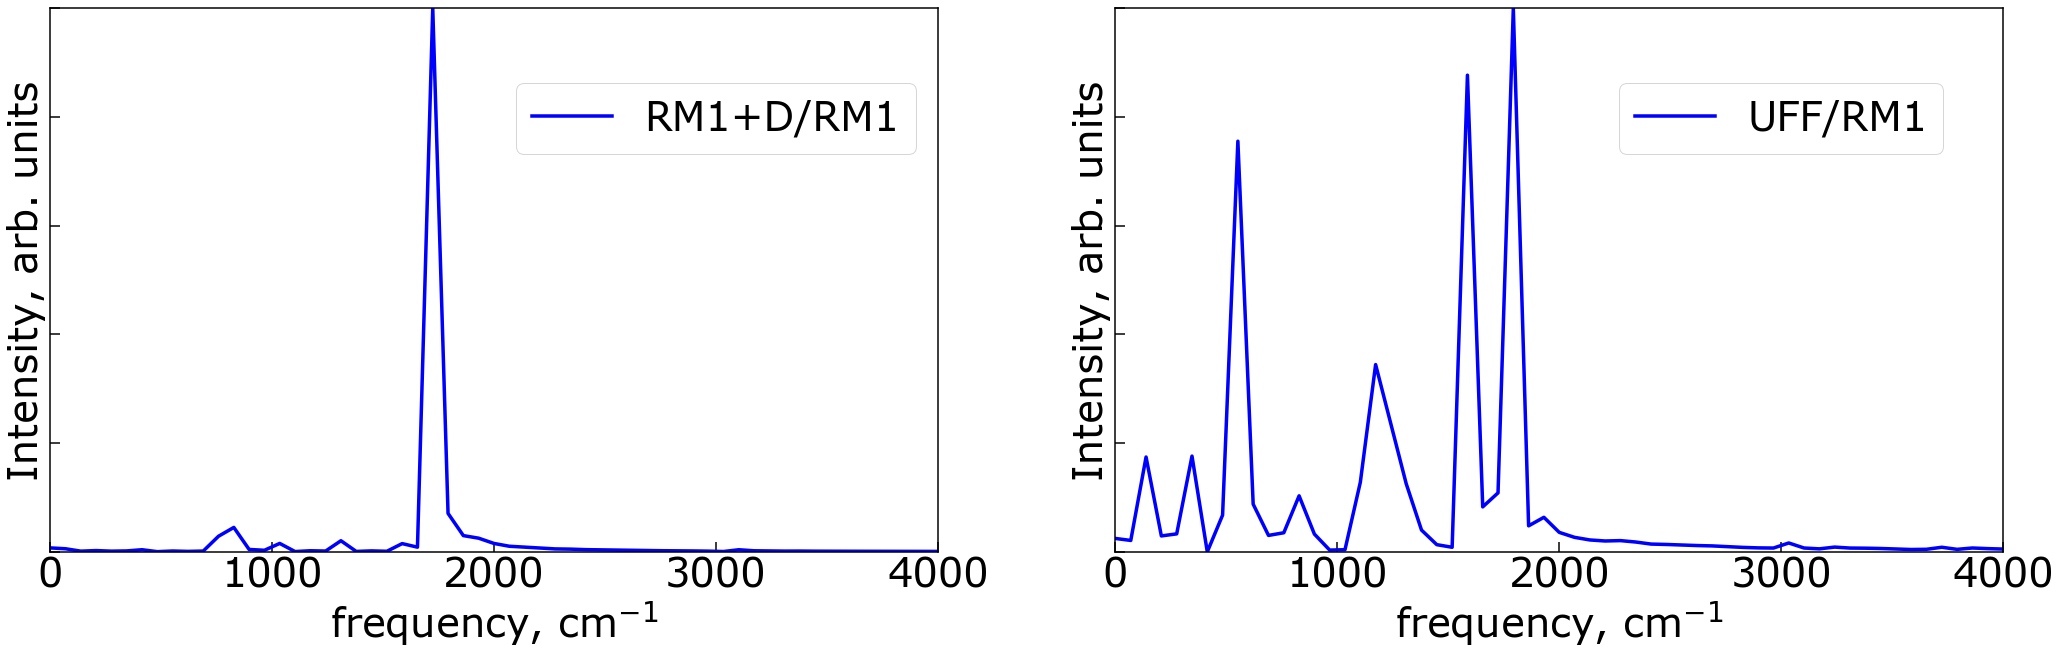

In [18]:
bbox = [(0.75,0.9),(0.75,0.9)]
labs = ["RM1+D/RM1","UFF/RM1"]
pax = [1.0,1.0]
plot_energy_single(out, Imax,["blue"],\
                ["-"], labs, [4000.0]*Npat,bbox,[10]*Npat,[0.2]*Npat, pax,"Intensity, arb. units","FT_of_ACFs.eps")